In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"jaewon2do","key":"e52a891c18fd5084ab8f9210e2a9e8f7"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c playground-series-s3e2

playground-series-s3e2.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls

'kaggle (1).json'   kaggle.json			 test.csv
'kaggle (2).json'   playground-series-s3e2.zip	 train.csv
'kaggle (3).json'   sample_data
'kaggle (4).json'   sample_submission.csv


In [6]:
!unzip playground-series-s3e2.zip

Archive:  playground-series-s3e2.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [7]:
# For each id in the test set, you must predict the probability for the target variable stroke.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train # hyptertension은 고혈압, avg_glucose_level은 혈당 수치

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


# 범주형 특성 처리
범주형 데이터를 수치 데이터로 표현하는 레이블 인코딩은 두개의 범주일 때 독립적인 의미로 사용 가능

In [8]:
train.gender.unique(), test.gender.unique()

(array(['Male', 'Female', 'Other'], dtype=object),
 array(['Female', 'Male', 'Other'], dtype=object))

In [9]:
train[train['gender'] == 'Other'].shape, test[test['gender'] == 'Other'].shape

((1, 12), (1, 11))

In [10]:
other_train = train[train['gender'] == 'Other']
other_test = test[test['gender'] == 'Other']

In [11]:
other_train.index, other_test.index

(Int64Index([9363], dtype='int64'), Int64Index([4629], dtype='int64'))

In [12]:
train = train.drop([train.index[9363]])
test = test.drop([test.index[4629]])

In [13]:
train = train.replace({'Male' : 1, 'Female' : 0})
test = test.replace({'Male' : 1, 'Female' : 0})
train.gender.unique(), test.gender.unique()

(array([1, 0]), array([0, 1]))

In [14]:
train.ever_married.unique(), test.ever_married.unique()

(array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object))

In [15]:
train = train.replace({'Yes' : 1, 'No' : 0})
test = test.replace({'Yes' : 1, 'No' : 0})
train.ever_married.unique(), test.ever_married.unique()

(array([1, 0]), array([1, 0]))

In [16]:
train.Residence_type.unique(), test.Residence_type.unique()

(array(['Urban', 'Rural'], dtype=object),
 array(['Rural', 'Urban'], dtype=object))

In [17]:
train = train.replace({'Urban' : 1, 'Rural' : 0})
test = test.replace({'Urban' : 1, 'Rural' : 0})
train.Residence_type.unique() , test.Residence_type.unique()

(array([1, 0]), array([0, 1]))

In [18]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from category_encoders import OneHotEncoder

enc = OneHotEncoder(cols = 'work_type', use_cat_names = True)
train = enc.fit_transform(train)
test = enc.fit_transform(test)
train = train[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
                       'work_type_Private', 'work_type_Self-employed', 'work_type_Govt_job', 'work_type_children', 'work_type_Never_worked',
                       'smoking_status']]
test = test[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi',
                       'work_type_Private', 'work_type_Self-employed', 'work_type_Govt_job', 'work_type_children', 'work_type_Never_worked',
                       'smoking_status']]

# smoking_status는 나중에 분류 예측을 위해서 남겨둠

# 훈련 데이터 확인 및 결측값 제거



In [20]:
# 1. 결측값 확인 및 제거

train.info() # 그러나 .info()만으로 결측갑이 확인되지 않는 경우도 존재.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15303 entries, 0 to 15303
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15303 non-null  int64  
 1   gender                   15303 non-null  int64  
 2   age                      15303 non-null  float64
 3   hypertension             15303 non-null  int64  
 4   heart_disease            15303 non-null  int64  
 5   ever_married             15303 non-null  int64  
 6   Residence_type           15303 non-null  int64  
 7   avg_glucose_level        15303 non-null  float64
 8   bmi                      15303 non-null  float64
 9   stroke                   15303 non-null  int64  
 10  work_type_Private        15303 non-null  int64  
 11  work_type_Self-employed  15303 non-null  int64  
 12  work_type_Govt_job       15303 non-null  int64  
 13  work_type_children       15303 non-null  int64  
 14  work_type_Never_worked

In [21]:
train.shape, test.shape

((15303, 16), (10203, 15))

In [22]:
# 1-1. id 오타 확인
for i in range(len(train.index)):
    if i < 9363: # 삭제된 gender == 'other' 데이터의 인덱스
        if i != train.iloc[i,0]:
            print("{}번째 id에 오타 존재".format(i)) # id 오타 없음 확인.
    else:
        if (i+1) != train.iloc[i,0]:
            print("{}번째 id에 오타 존재".format(i)) # id 오타 없음 확인.

In [23]:
for i in range(len(test.index)):
    if i < 4629:
        if (i+15304) != test.iloc[i,0]:
            print("{}번째 id에 오타 존재".format(i)) # id 오타 없음 확인.
    else:
        if (i+15305) != test.iloc[i,0]:
            print("{}번째 id에 오타 존재".format(i)) # id 오타 없음 확인.

In [24]:
# 1-2. 실수형 데이터 결측값 확인

train.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked
count,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000,15303.000000
mean,7651.388159,0.382735,41.419826,0.049729,0.023329,0.678625,0.499249,89.039396,28.113382,0.041299,0.637261,0.126707,0.100176,0.133111,0.002745
std,4418.151289,0.486070,21.443773,0.217391,0.150950,0.467020,0.500016,25.476872,6.722038,0.198988,0.480806,0.332656,0.300245,0.339706,0.052318
min,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3825.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,74.900000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7651.000000,0.000000,43.000000,0.000000,0.000000,1.000000,0.000000,85.120000,27.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11477.500000,1.000000,57.000000,0.000000,0.000000,1.000000,1.000000,96.980000,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,15303.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,267.600000,80.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
test.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked
count,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000,10203.000000
mean,20405.546310,0.378810,41.919334,0.051455,0.021758,0.693129,0.507792,89.196459,28.241689,0.644124,0.132216,0.097226,0.124473,0.001960
std,2945.926062,0.485115,21.098530,0.220936,0.145901,0.461218,0.499964,25.915298,6.733860,0.478801,0.338742,0.296280,0.330137,0.044233
min,15304.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17854.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,75.060000,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20406.000000,0.000000,43.000000,0.000000,0.000000,1.000000,1.000000,85.070000,27.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,22956.500000,1.000000,57.000000,0.000000,0.000000,1.000000,1.000000,96.745000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,25507.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,267.600000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# bmi, avg_glucose_level은 결측치가 없다.
# age 결측치 제거는 age가 0보다 작은 경우, 소수점이 있는 경우

miss_age = []
for a in train.age:
    if a - int(a) > 0:
        miss_age.append(a)
        print(a)

print("나이 결측치는 정수가 아닌 경우이고 나이 결측치 데이터의 수는 {}개이다.".format(len(miss_age))) # 401개

1.72
0.32
1.32
1.32
1.8
1.88
0.88
1.48
1.3
0.16
1.88
0.8
1.32
1.48
1.32
1.72
1.64
1.4
1.48
1.64
1.48
0.64
0.4
1.32
1.8
1.48
1.8
1.72
1.24
1.72
0.32
1.08
1.32
0.72
1.88
1.32
0.56
0.8
1.72
1.88
0.64
1.64
1.24
1.8
1.24
0.8
0.72
1.24
1.56
0.56
1.48
1.88
1.88
0.56
1.64
1.88
1.16
1.32
1.64
1.08
0.4
1.24
1.72
1.56
1.8
0.72
1.08
1.88
1.56
0.48
0.56
1.4
1.88
0.72
1.64
1.88
0.72
1.08
1.88
0.08
1.64
1.08
0.08
0.88
1.24
1.32
0.56
1.88
1.4
1.08
1.16
1.24
1.8
1.56
1.24
0.56
0.8
1.32
1.88
0.48
1.32
1.32
0.8
0.88
1.24
1.08
1.64
1.64
0.16
1.8
0.08
1.08
0.88
1.48
1.32
0.72
1.24
1.48
0.72
1.8
1.72
1.32
0.56
1.56
0.4
0.08
0.88
1.64
0.64
1.72
1.24
1.08
1.64
1.88
1.8
1.48
1.16
1.3
1.8
1.88
1.88
1.8
1.72
0.68
0.24
1.08
0.56
0.64
1.64
0.72
0.32
0.88
1.88
1.32
0.88
1.08
1.8
1.72
0.48
1.48
1.08
0.8
0.72
1.88
0.16
1.4
1.48
1.08
1.56
0.32
1.8
1.24
1.8
1.88
1.08
1.24
1.88
1.88
1.08
1.72
0.16
1.56
0.24
1.48
0.32
1.24
1.64
0.08
1.16
1.08
1.24
0.4
0.72
1.32
0.32
1.48
1.08
0.08
1.16
1.8
1.08
1.64
1.88
1.24
1.24
1.4
0.

In [27]:
for i in range(len(train)):
    if i != 9363 and train.loc[i,"age"] in miss_age:
        train = train.drop(i, axis=0)
train # 15303 -> 14902

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,smoking_status
0,0,1,28.0,0,0,1,1,79.53,31.1,0,1,0,0,0,0,never smoked
1,1,1,33.0,0,0,1,0,78.44,23.9,0,1,0,0,0,0,formerly smoked
2,2,0,42.0,0,0,1,0,103.00,40.3,0,1,0,0,0,0,Unknown
3,3,1,56.0,0,0,1,1,64.87,28.8,0,1,0,0,0,0,never smoked
4,4,0,24.0,0,0,0,0,73.36,28.8,0,1,0,0,0,0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,0,22.0,0,0,0,1,72.63,19.5,0,0,0,1,0,0,never smoked
15300,15300,0,46.0,1,0,1,1,101.19,32.1,0,1,0,0,0,0,never smoked
15301,15301,0,75.0,0,0,1,1,87.69,26.2,0,0,1,0,0,0,never smoked
15302,15302,1,46.0,0,0,1,0,101.13,22.5,0,1,0,0,0,0,Unknown


In [28]:
train.age = train.age.astype("int")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14902 entries, 0 to 15303
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       14902 non-null  int64  
 1   gender                   14902 non-null  int64  
 2   age                      14902 non-null  int64  
 3   hypertension             14902 non-null  int64  
 4   heart_disease            14902 non-null  int64  
 5   ever_married             14902 non-null  int64  
 6   Residence_type           14902 non-null  int64  
 7   avg_glucose_level        14902 non-null  float64
 8   bmi                      14902 non-null  float64
 9   stroke                   14902 non-null  int64  
 10  work_type_Private        14902 non-null  int64  
 11  work_type_Self-employed  14902 non-null  int64  
 12  work_type_Govt_job       14902 non-null  int64  
 13  work_type_children       14902 non-null  int64  
 14  work_type_Never_worked

In [29]:
# bmi, avg_glucose_level은 결측치가 없다.
# age 결측치 제거는 age가 0보다 작은 경우, 소수점이 있는 경우

miss_age = []
for a in test.age:
    if a - int(a) > 0:
        miss_age.append(a)
        print(a)

print("나이 결측치는 정수가 아닌 경우이고 나이 결측치 데이터의 수는 {}개이다.".format(len(miss_age))) # 203개

1.72
1.48
1.24
0.32
1.88
1.48
0.8
1.48
1.48
1.16
1.56
1.64
0.32
1.08
1.64
0.8
1.08
1.88
1.24
1.88
0.24
0.32
1.48
0.88
0.72
0.88
1.72
1.16
1.24
1.8
1.32
0.8
1.32
1.8
0.4
1.24
1.88
1.64
1.8
1.32
1.56
1.8
1.16
1.24
1.88
1.48
0.32
1.08
0.32
1.08
0.24
1.56
1.88
1.32
0.08
1.24
0.72
0.32
0.88
1.8
1.64
1.56
0.88
1.32
0.32
0.24
1.25
1.48
1.16
1.88
1.48
1.88
0.4
0.72
1.88
1.88
1.08
1.56
1.24
1.8
1.72
0.72
1.88
1.24
0.8
1.8
1.8
1.32
1.8
1.48
1.64
0.72
0.24
0.56
1.08
0.33
1.08
1.56
1.24
0.32
0.56
1.8
0.08
1.8
1.48
1.88
1.72
1.16
1.72
0.32
1.8
1.8
1.24
1.08
0.64
0.72
1.48
0.56
0.56
1.08
1.08
1.9
1.56
1.72
1.24
0.88
1.48
0.24
1.64
1.32
1.72
1.08
0.64
0.24
1.08
1.64
1.56
1.8
1.64
0.8
1.64
0.48
1.56
1.32
1.8
1.24
0.72
0.64
0.8
1.32
1.8
1.32
1.72
1.88
1.88
0.72
1.8
0.64
0.48
0.56
1.32
0.32
1.64
1.32
1.64
1.32
1.88
1.24
1.72
1.72
1.64
1.16
1.72
1.88
1.24
1.32
1.56
1.48
1.32
0.72
1.56
0.72
1.08
1.8
0.32
1.64
1.32
0.24
1.4
1.4
1.24
1.8
1.72
1.88
0.4
1.16
1.72
1.88
1.48
1.32
0.88
1.48
1.24
나이 결측치는 정수가 아닌 경

In [30]:
for i in range(len(test)):
    if i != 4629 and test.loc[i,"age"] in miss_age:
        test = test.drop(i, axis=0)
test # 10203 -> 10000

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,smoking_status
0,15304,0,57.0,0,0,1,0,82.54,33.4,1,0,0,0,0,Unknown
1,15305,1,70.0,1,0,1,1,72.06,28.5,1,0,0,0,0,Unknown
2,15306,0,5.0,0,0,0,1,103.72,19.5,0,0,0,1,0,Unknown
3,15307,0,56.0,0,0,1,1,69.24,41.4,0,0,1,0,0,smokes
4,15308,1,32.0,0,0,1,0,111.15,30.1,1,0,0,0,0,smokes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,0,27.0,0,0,0,1,75.77,17.6,1,0,0,0,0,never smoked
10200,25504,1,49.0,0,0,1,1,102.91,26.7,1,0,0,0,0,Unknown
10201,25505,0,3.0,0,0,0,0,104.04,18.3,0,0,0,1,0,Unknown
10202,25506,1,31.0,0,0,1,1,82.41,28.7,1,0,0,0,0,never smoked


In [31]:
test.age = test.age.astype("int")
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10203
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10000 non-null  int64  
 1   gender                   10000 non-null  int64  
 2   age                      10000 non-null  int64  
 3   hypertension             10000 non-null  int64  
 4   heart_disease            10000 non-null  int64  
 5   ever_married             10000 non-null  int64  
 6   Residence_type           10000 non-null  int64  
 7   avg_glucose_level        10000 non-null  float64
 8   bmi                      10000 non-null  float64
 9   work_type_Private        10000 non-null  int64  
 10  work_type_Self-employed  10000 non-null  int64  
 11  work_type_Govt_job       10000 non-null  int64  
 12  work_type_children       10000 non-null  int64  
 13  work_type_Never_worked   10000 non-null  int64  
 14  smoking_status        

In [32]:
# 1-3. 범주형 결측 처리

# 세계 결혼 가능 최소 나이 기사 : https://www.segye.com/newsView/20161228001241 
# -> 데이터에 국적이 없기 때문에 193개국의 평균 사용 -> 16세 미만 데이터 중 ever_married가 Yes인 경우 제거

nan_married = []
for n in train[(train['age'] < 16) & (train['ever_married'] == 1)].loc[:,:].index:
    nan_married.append(n)

for i in nan_married:
    train = train.drop(i, axis=0)

train.shape # 14902 -> 14899

(14899, 16)

In [33]:
# International child labor standards set the minimum age for light work at 13 years and general employment at 15.
# 출처 : https://bluemarblepayroll.com/international-labor-laws-minimum-age-requirements/

nan_children = []
for n in train[(train['age'] < 15) & (train['work_type_children'] != 1)].loc[:,:].index:
    nan_children.append(n)

for i in nan_children:
    train = train.drop(i, axis=0)

train.shape # 14899 -> 14760

(14760, 16)

In [34]:
nan_married = []
for n in test[(test['age'] < 16) & (test['ever_married'] == 1)].loc[:,:].index:
    nan_married.append(n)

for i in nan_married:
    test = test.drop(i, axis=0)

test.shape # 10000 -> 9998

(9998, 15)

In [35]:
nan_children = []
for n in test[(test['age'] < 15) & (train['work_type_children'] != 1)].loc[:,:].index:
    nan_children.append(n)

for i in nan_children:
    test = test.drop(i, axis=0)

test.shape # 9998 -> 9031

<ipython-input-35-dc0d021d2ec4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for n in test[(test['age'] < 15) & (train['work_type_children'] != 1)].loc[:,:].index:


(9031, 15)

In [36]:
# 원래는 seaborn의 countplot을 사용하여 work_type의 결측값이 없다는 것을 확인하려 했으나 원핫인코딩으로 어려워졌음...
sum = 0
for c in list(train.filter(like="work_type").columns):
    print(c, train[train[c] == 1].shape[0])
    sum += train[train[c] == 1].shape[0]

print(train.shape[0] == sum,"\n")
sum -= train.shape[0]

for c in list(test.filter(like="work_type").columns):
    print(c, test[test[c] == 1].shape[0])
    sum += test[test[c] == 1].shape[0]

print(test.shape[0] == sum)

work_type_Private 9633
work_type_Self-employed 1931
work_type_Govt_job 1530
work_type_children 1641
work_type_Never_worked 25
True 

work_type_Private 6504
work_type_Self-employed 1346
work_type_Govt_job 992
work_type_children 174
work_type_Never_worked 15
True


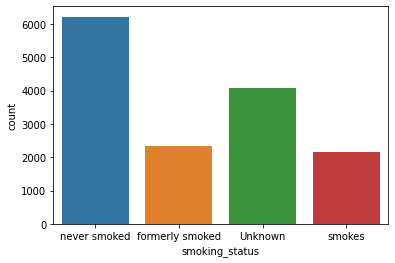

In [37]:
sns.countplot(x="smoking_status", data=train) # Unknown이 결측값

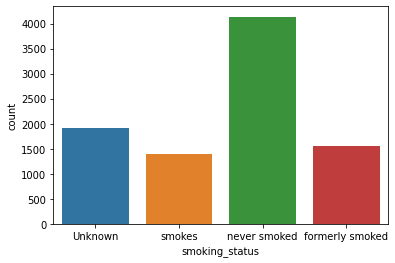

In [38]:
sns.countplot(x="smoking_status", data=test)

In [39]:
train.reset_index(drop=True, inplace=True)
id = train.id
train = train.drop(['id'], axis='columns')
train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,smoking_status
0,1,28,0,0,1,1,79.53,31.1,0,1,0,0,0,0,never smoked
1,1,33,0,0,1,0,78.44,23.9,0,1,0,0,0,0,formerly smoked
2,0,42,0,0,1,0,103.00,40.3,0,1,0,0,0,0,Unknown
3,1,56,0,0,1,1,64.87,28.8,0,1,0,0,0,0,never smoked
4,0,24,0,0,0,0,73.36,28.8,0,1,0,0,0,0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,0,17,0,0,0,0,77.65,24.8,0,1,0,0,0,0,smokes
14756,0,22,0,0,0,1,72.63,19.5,0,0,0,1,0,0,never smoked
14757,0,46,1,0,1,1,101.19,32.1,0,1,0,0,0,0,never smoked
14758,0,75,0,0,1,1,87.69,26.2,0,0,1,0,0,0,never smoked


In [40]:
# 먼저 랜덤포레스트 분류를 통해서 smoking_status가 unknown인 데이터를 분류한다.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

data = train[train['smoking_status'] != 'Unknown'].iloc[:,:-1].to_numpy()
target = train[train['smoking_status'] != 'Unknown'].iloc[:,-1]

dic = {'n_estimators': [100, 200, 300, 400, 500, 600, 700],
       'max_depth' : [4, 5, 6, 7, 8, 9, 10]} 

rf = RandomForestClassifier()
gs = GridSearchCV(estimator = rf, param_grid = dic, cv = 5)

gs.fit(data, target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]})

In [41]:
gs.best_params_, gs.best_score_

({'max_depth': 8, 'n_estimators': 300}, 0.5849481403977363)

In [42]:
rf = RandomForestClassifier(oob_score=True, n_estimators=300, max_depth=8)
rf.fit(data,target)
rf.oob_score_ # 정확도가 너무 낮은 점이 문제다.

0.5830759150051483

In [44]:
substitute = list(rf.predict(train[train['smoking_status'] == 'Unknown'].iloc[:,:-1]))
# train[train['smoking_status'] == 'Unknown']['smoking_status'] = substitute : 이게 안되는 것이 문제..)

for i in train[train['smoking_status'] == 'Unknown'].index:
    train.iloc[i,-1] = substitute[0]
    del substitute [0]

train['smoking_status'].unique()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [45]:
train = train.

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_children,work_type_Never_worked,smoking_status
0,1,28,0,0,1,1,79.53,31.1,0,1,0,0,0,0,never smoked
1,1,33,0,0,1,0,78.44,23.9,0,1,0,0,0,0,formerly smoked
2,0,42,0,0,1,0,103.00,40.3,0,1,0,0,0,0,never smoked
3,1,56,0,0,1,1,64.87,28.8,0,1,0,0,0,0,never smoked
4,0,24,0,0,0,0,73.36,28.8,0,1,0,0,0,0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,0,17,0,0,0,0,77.65,24.8,0,1,0,0,0,0,smokes
14756,0,22,0,0,0,1,72.63,19.5,0,0,0,1,0,0,never smoked
14757,0,46,1,0,1,1,101.19,32.1,0,1,0,0,0,0,never smoked
14758,0,75,0,0,1,1,87.69,26.2,0,0,1,0,0,0,never smoked
